## Regression Problem: Predict systolic blood pressure

Import Statements

In [1]:
import pandas as pd
import math
from sklearn import linear_model, cross_validation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

/home/user/dummy/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Reading the data file

In [2]:
sbp_data = pd.read_csv("Ex03_SystolicBP_Regreesion.csv")

In [3]:
y_reg = sbp_data['SystolicBP']
x_reg = sbp_data.drop(['SystolicBP'], axis=1)

## Basic Analysis : Correlation Matrix

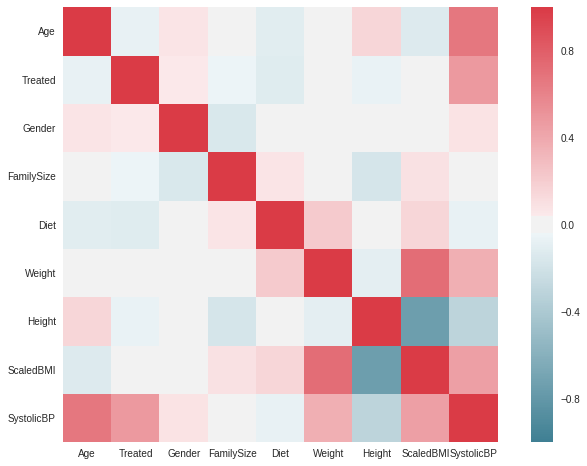

In [4]:
sbp_data.corr()
f, ax = plt.subplots(figsize=(12, 8))
corr = sbp_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

## Scatter plots of each feature with the target to see relationship

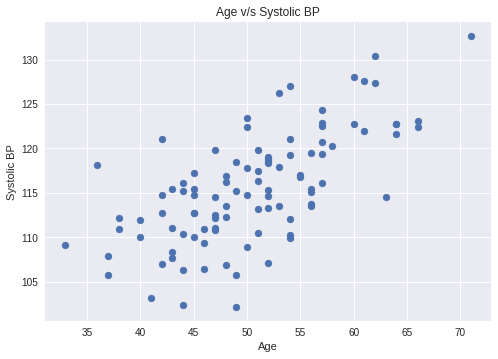

In [5]:
plt.scatter(sbp_data.Age, sbp_data.SystolicBP)
plt.xlabel("Age")
plt.ylabel("Systolic BP")
plt.title("Age v/s Systolic BP")
plt.show()

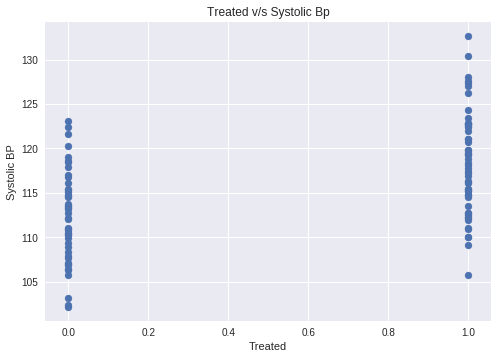

In [6]:
plt.scatter(sbp_data.Treated, sbp_data.SystolicBP)
plt.xlabel("Treated")
plt.ylabel("Systolic BP")
plt.title("Treated v/s Systolic Bp")
plt.show()

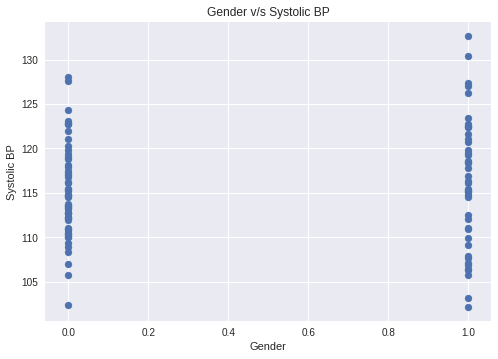

In [7]:
plt.scatter(sbp_data.Gender, sbp_data.SystolicBP)
plt.xlabel("Gender")
plt.ylabel("Systolic BP")
plt.title("Gender v/s Systolic BP")
plt.show()

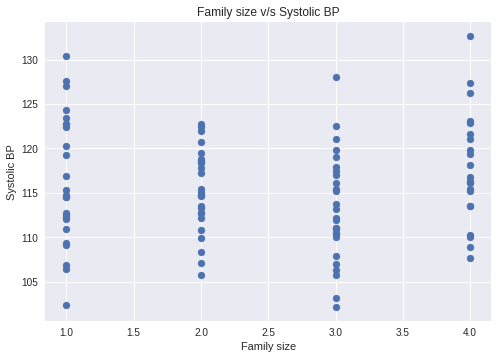

In [8]:
plt.scatter(sbp_data.FamilySize, sbp_data.SystolicBP)
plt.xlabel("Family size")
plt.ylabel("Systolic BP")
plt.title("Family size v/s Systolic BP")
plt.show()

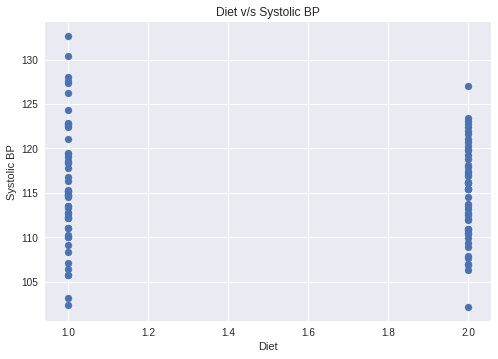

In [9]:
plt.scatter(sbp_data.Diet, sbp_data.SystolicBP)
plt.xlabel("Diet")
plt.ylabel("Systolic BP")
plt.title("Diet v/s Systolic BP")
plt.show()

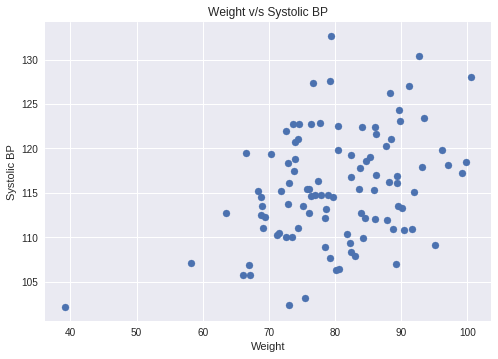

In [10]:
plt.scatter(sbp_data.Weight, sbp_data.SystolicBP)
plt.xlabel("Weight")
plt.ylabel("Systolic BP")
plt.title("Weight v/s Systolic BP")
plt.show()

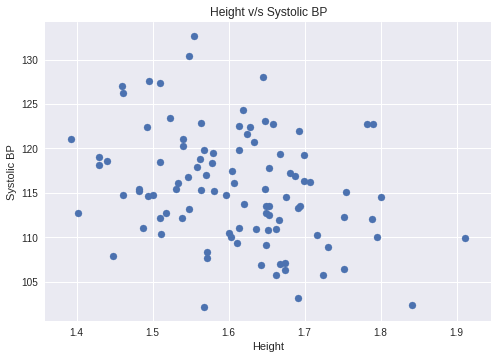

In [11]:
plt.scatter(sbp_data.Height, sbp_data.SystolicBP)
plt.xlabel("Height")
plt.ylabel("Systolic BP")
plt.title("Height v/s Systolic BP")
plt.show()

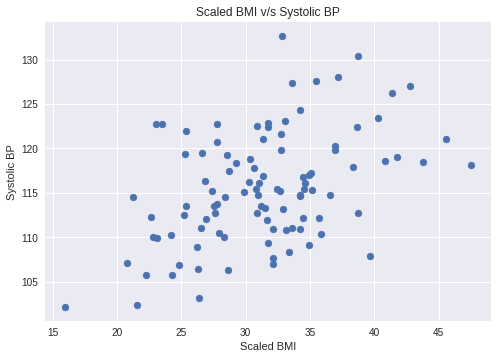

In [12]:
plt.scatter(sbp_data.ScaledBMI, sbp_data.SystolicBP)
plt.xlabel("Scaled BMI")
plt.ylabel("Systolic BP")
plt.title("Scaled BMI v/s Systolic BP")
plt.show()

In [13]:
# Creating the test and train datasets
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x_reg, y_reg, test_size=0.40, random_state=5)

In [14]:
# Standardising the data
x_train_sc = (x_train-x_train.mean())/x_train.std()
x_test_sc = (x_test-x_test.mean())/x_test.std()
y_train_sc = (y_train-y_train.mean())/y_train.std()

## 1. Linear Regression Model

In [15]:
reg = linear_model.LinearRegression(normalize=True)
reg.fit (x_train_sc, y_train_sc)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [16]:
tr_coeffs = reg.coef_
tr_resi = reg.residues_
tr_intr = reg.intercept_
print("Coeffs: ", tr_coeffs)
print("Residuals: ", tr_resi)
print("Intercept: ", tr_intr)

Coeffs:  [  7.61596386e-01   5.51526328e-01   2.51889779e-03   3.97540653e-04
  -5.44835836e-04  -1.55103696e-02   2.37367000e-02   5.69919534e-01]
Residuals:  0.0207237839076
Intercept:  -9.42523703555e-16


/home/user/dummy/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


In [17]:
pred_lin = reg.predict(x_test_sc)
pred_lin = (pred_lin*y_test.std())+y_test.mean()

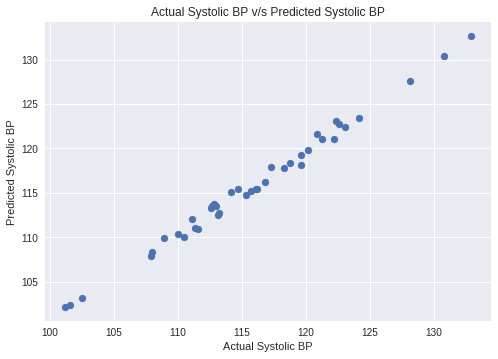

In [18]:
plt.scatter(pred_lin, y_test)
plt.xlabel("Actual Systolic BP")
plt.ylabel("Predicted Systolic BP")
plt.title("Actual Systolic BP v/s Predicted Systolic BP")
plt.show()

ERROR CALCULATION

In [19]:
errors_abs = np.abs(pred_lin - y_test)
errors = pred_lin - y_test

In [20]:
errors.mean()

-2.9132252166164105e-14

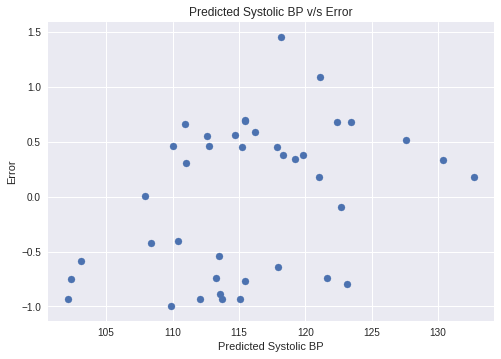

In [21]:
plt.scatter(y_test, errors)
plt.xlabel("Predicted Systolic BP")
plt.ylabel("Error")
plt.title("Predicted Systolic BP v/s Error")
plt.show()

HISTOGRAM PLOT

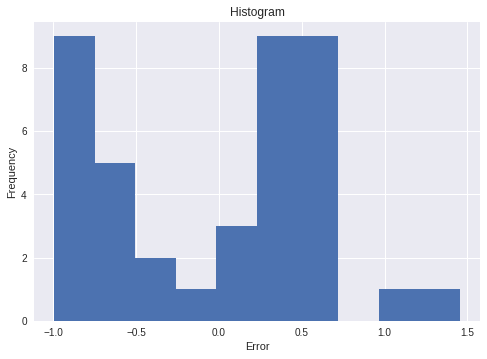

In [22]:
plt.hist(errors)
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title("Histogram")
plt.show()

BOX PLOT

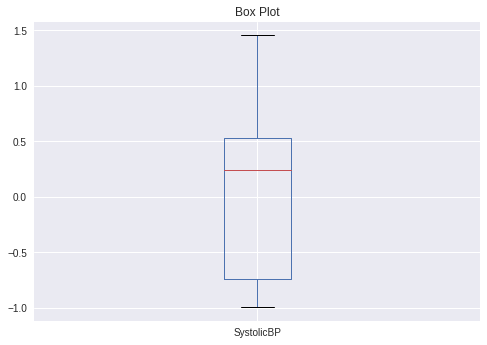

In [23]:
y = pd.DataFrame(errors)
y.plot(kind='box')
plt.title("Box Plot")
plt.show()

## 2. Linear Regression Model : Ridge

In [38]:
alphas_r = np.linspace(0.0001,15,1000)*0.5

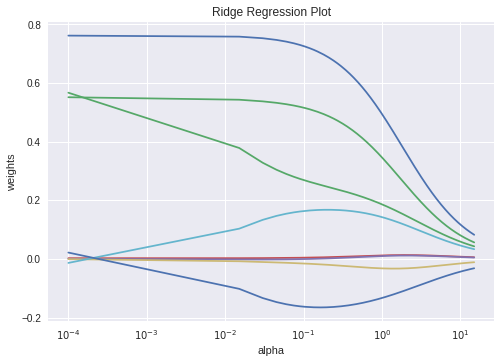

In [39]:
ridge = linear_model.Ridge(normalize=True)
coeffs = []
for a in alphas_r:
    ridge.set_params(alpha=a)
    ridge.fit(np.array(x_train_sc), np.array(y_train_sc))
    coeffs.append(ridge.coef_)
ax = plt.gca()
ax.plot(2*alphas_r, coeffs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title("Ridge Regression Plot")
plt.show()

In [40]:
ridgecv = linear_model.RidgeCV(alphas=alphas_r, scoring='neg_mean_squared_error', normalize=True)
ridgecv.fit(np.array(x_train_sc), np.array(y_train_sc))
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(np.array(x_train_sc), np.array(y_train_sc))
pred = ridge.predict(x_test_sc)
mean_squared_error(y_test, (pred*y_test.std())+y_test.mean())

0.44564327575675133

In [41]:
print(pd.Series(ridge.coef_, index=x_test_sc.columns))
print("Intercept: ", ridge.intercept_)
print("Aplha: ", ridge.alpha)

Age           0.761599
Treated       0.551434
Gender        0.002517
FamilySize    0.000361
Diet         -0.000656
Weight       -0.013610
Height        0.021718
ScaledBMI     0.566877
dtype: float64
Intercept:  -9.27089080707e-16
Aplha:  5e-05


PREDICT THE MODEL

In [42]:
pred_ridge = ridge.predict(np.array(x_test_sc))
pred_ridge = (pred_ridge*y_test.std())+y_test.mean()

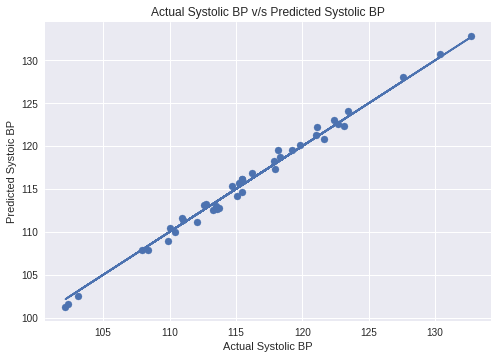

In [43]:
plt.scatter(y_test, pred_ridge)
plt.plot(y_test, y_test)
plt.xlabel("Actual Systolic BP")
plt.ylabel("Predicted Systoic BP")
plt.title("Actual Systolic BP v/s Predicted Systolic BP")
plt.show()

ERROR CALCULATION

In [45]:
errors_abs = np.abs(np.array(y_test) - pred_ridge)
errors = np.array(y_test).reshape(40,1) - pred_ridge.reshape(40,1)

In [46]:
errors.mean()

2.8776980798284056e-14

In [47]:
errors.var()

0.44564327575675139

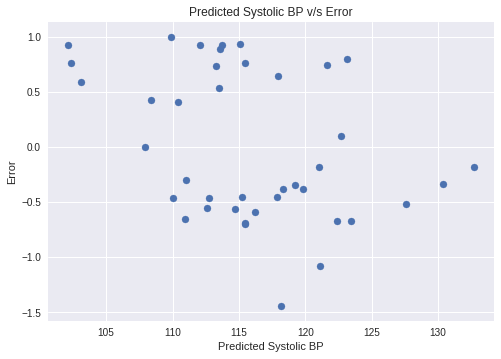

In [49]:
plt.scatter(np.array(y_test).reshape(40,1), errors)
plt.xlabel("Predicted Systolic BP")
plt.ylabel("Error")
plt.title("Predicted Systolic BP v/s Error")
plt.show()

HISTOGRAM OF ERRORS : RIDGE

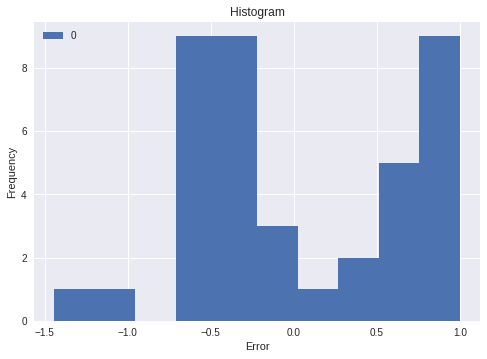

In [50]:
y = pd.DataFrame(errors)
y.plot(kind = 'hist')
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title("Histogram")
plt.show()

BOX PLOT

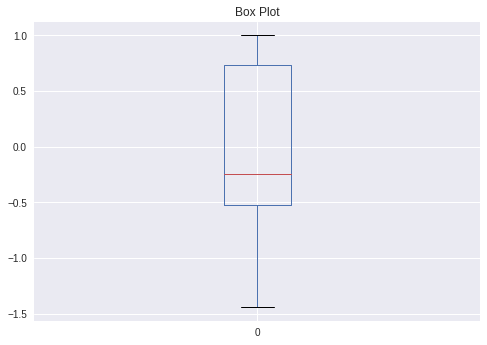

In [51]:
y.plot(kind = 'box')
plt.title("Box Plot")
plt.show()

## 3. Linear Regression Model : Lasso

In [24]:
alphas = np.linspace(0.0001,0.5,1000)*0.5

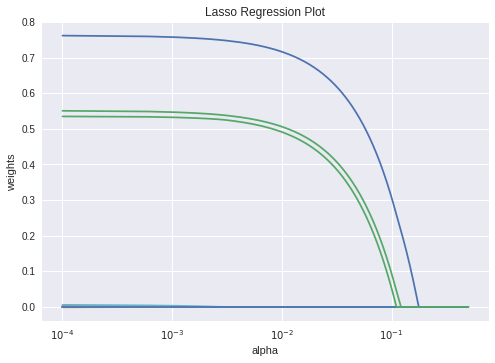

In [25]:
lasso = linear_model.Lasso(max_iter = 10000, normalize=True)
coeffs = []
for al in alphas:
    lasso.set_params(alpha=al)
    lasso.fit(np.array(x_train_sc), np.array(y_train_sc))
    coeffs.append(lasso.coef_)
ax = plt.gca()
ax.plot(2*alphas, coeffs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title("Lasso Regression Plot")
plt.show()

In [26]:
lassocv = linear_model.LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(np.array(x_train_sc), np.array(y_train_sc))
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(np.array(x_train_sc), np.array(y_train_sc))
pred = lasso.predict(x_test_sc)
mean_squared_error(y_test, (pred*y_test.std())+y_test.mean())

0.41974881763821098

In [27]:
print(pd.Series(lasso.coef_, index=x_test_sc.columns))
print("Intercept: ", lasso.intercept_)
print("Aplha: ", lasso.alpha)

Age           0.760426
Treated       0.549503
Gender        0.001205
FamilySize   -0.000000
Diet         -0.000335
Weight        0.004890
Height       -0.000000
ScaledBMI     0.534220
dtype: float64
Intercept:  -7.62935027248e-16
Aplha:  0.000190010280221


PREDICT THE MODEL

In [28]:
pred_lasso = lasso.predict(x_test_sc)

In [29]:
pred_lasso = (pred_lasso*y_test.std())+y_test.mean()

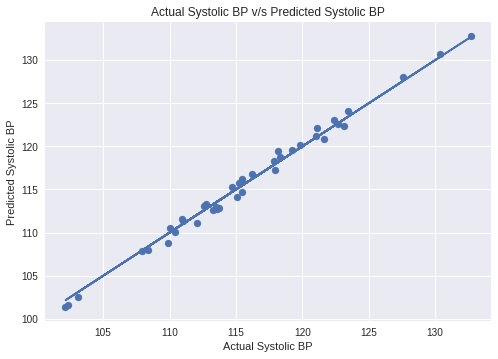

In [30]:
plt.scatter(y_test, pred_lasso)
plt.plot(y_test, y_test)
plt.xlabel("Actual Systolic BP")
plt.ylabel("Predicted Systolic BP")
plt.title("Actual Systolic BP v/s Predicted Systolic BP")
plt.show()

ERROR CALCULATION

In [32]:
errors_abs = np.abs(pred_lasso-np.array(y_test))
errors = pred_lasso.reshape(40,1)-np.array(y_test).reshape(40,1)

In [33]:
errors.mean()

-2.7355895326763858e-14

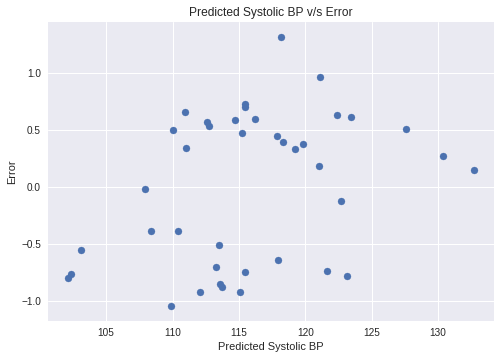

In [35]:
plt.scatter(np.array(y_test).reshape(40,1), errors)
plt.xlabel("Predicted Systolic BP")
plt.ylabel("Error")
plt.title("Predicted Systolic BP v/s Error")
plt.show()

HISTOGRAM : LASSO

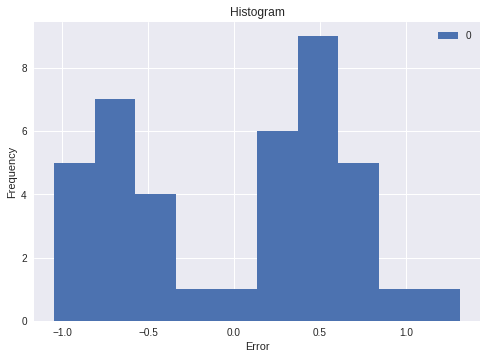

In [36]:
y = pd.DataFrame(errors)
y.plot(kind = 'hist')
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title("Histogram")
plt.show()

BOX PLOT : LASSO

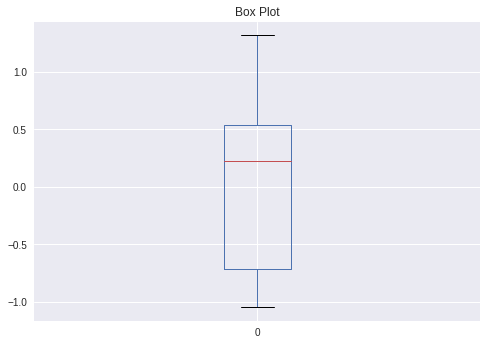

In [37]:
y.plot(kind = 'box')
plt.title("Box Plot")
plt.show()